In [3]:
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np

from importlib import reload

%reload_ext autoreload
%autoreload 2
    
import pyturb
reload(pyturb)

from time import sleep, perf_counter

import sys
sys.path.append('/Users/00075868/MyCodes/AnalysisTools/')
import analysistools
import gc

In [4]:
# Tools to measure velocity fields
mturb = pyturb.measure_turbulence.MeasureVelocityField()
# Tools to generate gridded velocity fields given particle data
gt = pyturb.GriddingTools()
# Read snapshot data
snap=analysistools.SnapshotTools(snapfilename="/Users/00075868/MyCodes/AnalysisTools/data/cluster_324/snap_128",snapfileformat="HDF5")
# Read halo catalogue data
halos=analysistools.HaloTools(halocatfilename="/Users/00075868/MyCodes/AnalysisTools/data/cluster_324/GIZMO-NewMDCLUSTER_0324.snap_128.z0.000",halocatfileformat="AHF")

Assuming positions are type float32
Assuming particle IDs are type 32 bit


In [5]:
snap.ReadSnapshot()
halos.ReadHaloCatalogue()
snap.LoadParticlesByType(part_type='gas')
diffpos=snap.gas.pos-halos.GroupPos[0]
diffvel=snap.gas.vel-halos.GroupVel[0]
rcut=2e3
keepid=np.where((diffpos[:,0]**2+diffpos[:,1]**2+diffpos[:,2]**2)<rcut*rcut)

Reading data from /Users/00075868/MyCodes/AnalysisTools/data/cluster_324/snap_128.hdf5
Simulation scale factor: 1.000000
Number of particles: 0019546412
Number of particle types: 6
istart: [       0  2302025  5124169  5476425 19370952 19545512]
2302025 0 0 2302025 2302025
2822144 1 2302025 5124169 2822144
352256 2 5124169 5476425 352256
13894527 3 5476425 19370952 13894527
174560 4 19370952 19545512 174560
900 5 19545512 19546412 900
Reading data for 19620 groups


In [9]:
grid_limits =  np.array([-1,1,-1,1,-1,1], dtype=np.float64)*rcut
grid_size = (128,128,128)
tstart=perf_counter()
vel_field_smooth = gt.smooth_to_grid(diffpos[keepid], diffvel[keepid], grid_size, grid_limits, method="CIC")
tfinish=perf_counter()
print(f"Finished smoothing velocity field from point data in {tfinish-tstart:.4f}\n")

Finished smoothing velocity field from point data in 0.1671



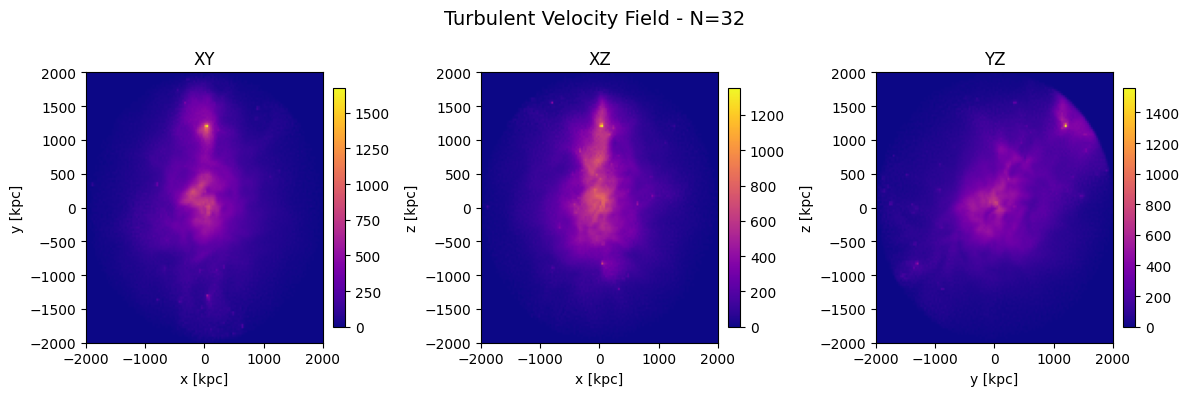

In [10]:
fig, axes = gt.plot_3d_projections(vel_field_smooth, grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32")


In [11]:
# Compute for the velocity field generated by pyturb...
k,pk,_=mturb.fft().compute_power_spectrum(vel_field_smooth, box_size=2*rcut, component='energy', method='radial')


2097152
34035124921364.945 34035124921364.94


/tmp/ipykernel_40057/765538017.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


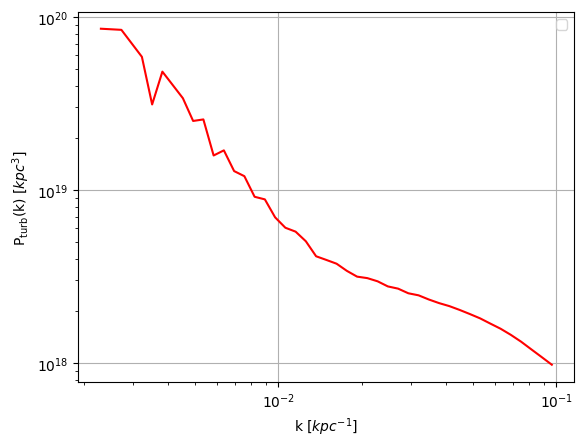

In [13]:
plt.xlabel(r"k [$kpc^{-1}$]")
plt.ylabel(r"P$_\text{turb}$(k) [$kpc^{3}$]")
plt.xscale("log")
plt.yscale("log")
plt.plot(k,pk,color="red")
plt.grid(True)
plt.legend()

In [21]:
# Compute for the velocity field generated by pyturb...
k,pk=mturb.wavelets().local_power_spectrum(vel_field_smooth, box_size=2*rcut)


ValueError: x and y must have same first dimension, but have shapes (10,) and (3, 10)

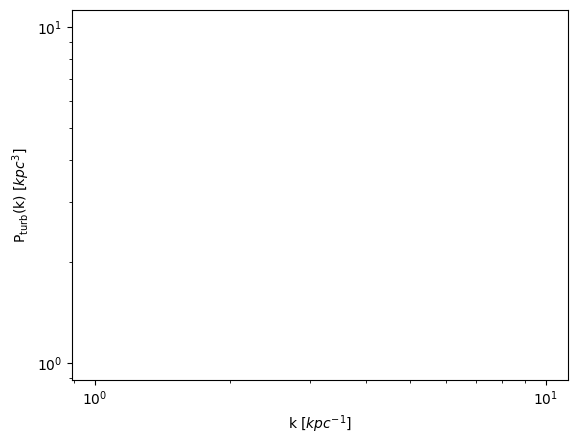

In [22]:
plt.xlabel(r"k [$kpc^{-1}$]")
plt.ylabel(r"P$_\text{turb}$(k) [$kpc^{3}$]")
plt.xscale("log")
plt.yscale("log")
plt.plot(k,pk,color="red")
plt.grid(True)
plt.legend()